# 1) Data Understanding

In [1]:
#Alle notwendigen Libarys für das Data Understanding importieren
# Hierzu eignet sich pandas zur Datenanalyse 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Einlesen des Datensets 
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.shape

(10000, 14)

In [3]:
#Um einen ersten Einblick zu bekommen, lassen wir uns die ersten 10 Spalten des Datensets ausgeben
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
#Man hat bereits im Output von line 17 gesehen, dass der Customer mit der RowNumber 10 den Namen H? hat, was keinen Sinn ergibt
#Dem muss man sich später im Step "Data Cleaning widmen"
dataset[9:10]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
#Schauen ob in einer Reihe (column) Werte fehlen
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#Wir lassen uns für das Verständnis die "unique variables" jeder Spalte ausgeben
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## <font color='red'>Erkentnisse </font>
1. Das Datenset hat 10.000 Spalten (Rows) und 14 Reihen (Attributes)
2. Im Datenset fehlt in keiner Reihe (column) ein Eintrag
3. Es kann sein dass in der Reihe "Surname" einige Namen fehlerhaft sind (siehe Output line 25, mit dem Surname "H?"). Dem muss man sich später im Schritt "Data Cleaning widmen".
4. In Output line 7 sehen wir, dass wir Hauptsächlich kategorische Variablen haben und 5 kontinuierliche Variablen 

## <font color='blue'>Fragen </font>
1. Manche Kunden, welche die Bank verlassen haben, (Churn == 1) haben immer noch einen Wert in der Column "Balance". Was bedeutet das?
2. Was genau bedeutet es ein aktives Mitglied zu sein und wie wird das bewertet? 
3. Mehr infos über die Column "NumofProducts" bzw. über die Produkte selbst würden bessere Informationen bereitstellen.

># 2) Data Preparation & Preprocessing

### a.) Data Visualization & Exploratary Data Analysis

In [8]:
dataset.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
data = {"Attribute":["Verlassen", "Nicht Verlassen"],
        "Anzahl":[2037,7963]
        };

df = pd.DataFrame(data=data);

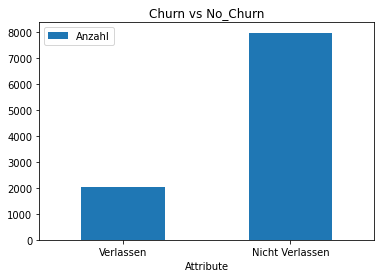

In [10]:
#Visualisierung der Ausprägungen der Column "Exited"
df.plot.bar(x="Attribute", y="Anzahl", rot=0, title="Churn vs No_Churn");

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

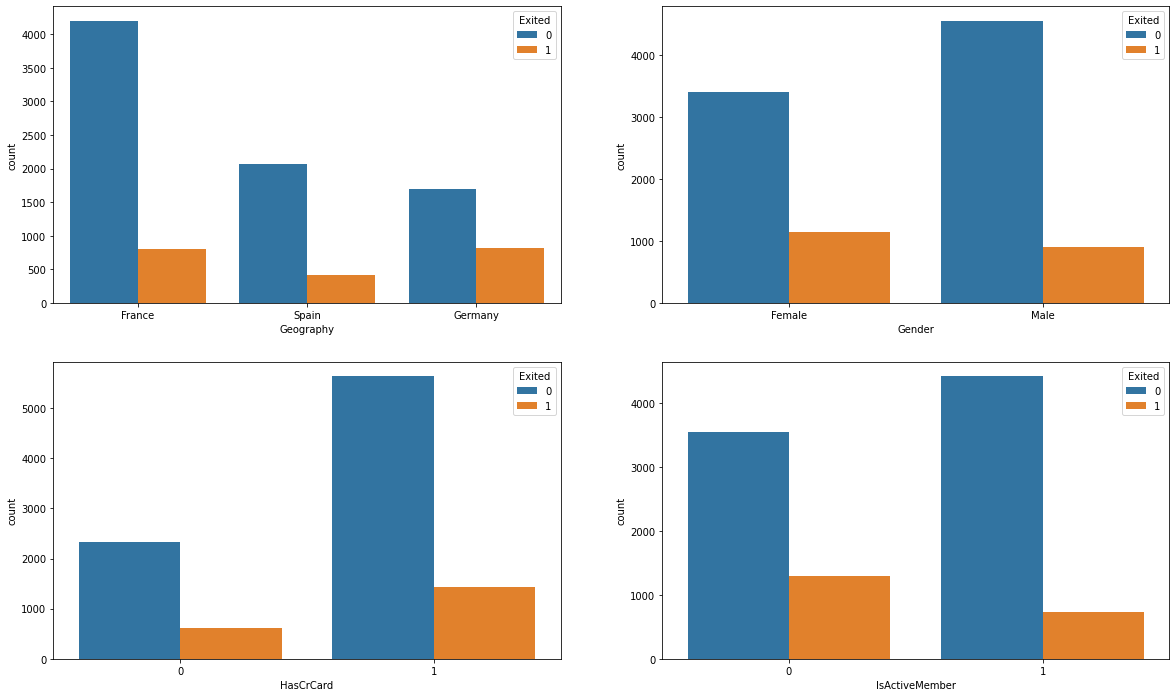

In [11]:
#Visualisierung der kategorischen Variablen Geogrphy, Gender, HasCrCard (Credit Card), IsActiveMember in Abhängigkeit davon, 
#ob die Personen die Bank verlassen haben oder nicht 

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

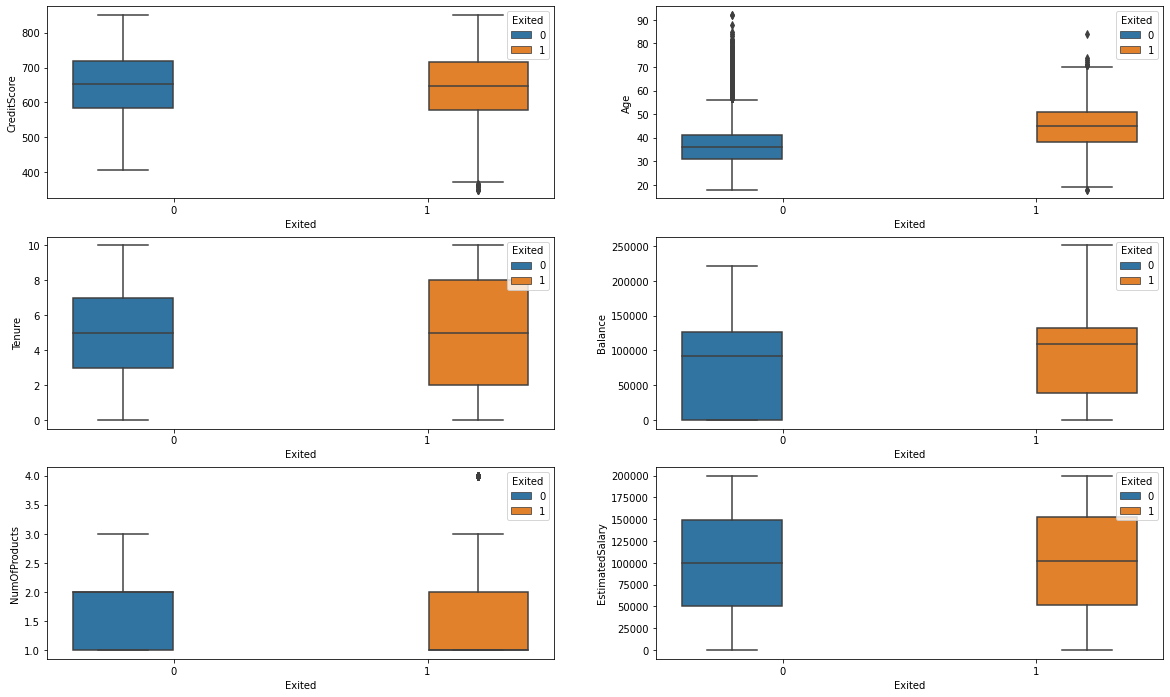

In [12]:
#Visualisierung der kontunuierlichen Variablen in Abhängigkeit davon, 
#ob die Personen die Bank verlassen haben oder nicht 

fig, axarr = plt.subplots(3, 2, figsize=(20, 12))

sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = dataset , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][1])

## <font color='red'>Erste Erkentnisse </font>
1. Man kann anhand Output line 28 an der Bar Chart erkennen, dass c.a. 20% aller erfassten Kunden im Datenset die Bank verlassen haben
2. Das Dataset ist <b>imbalanced</b> zugunsten der Ausprägung "Exited" == 0 (Kunde hat die Bank nicht verlassen). Es herrscht ein Verhältnis von fast 4:1 für diese Ausprägung. Um später nicht den Klassifikator damit zu beeinflussen, muss man später für ein <b>Balanced Dataset</b> sorgen.


## <font color='red'>Erkentnisse aus den Kategorischen Variablen </font>
1. Ein Großteil der Erfassten Kunden kommt aus Frankreich und Deutsche Kunden verlassen die Bank am wahrscheinlichsten (in Relation)
2. Frauen verlassen diese Bank häufiger als Männer.
3. Ein Großteil der Kunden, die die Bank verlassen haben, haben/ hatten eine Kreditkarte. Allerdings ist das Churn-Verhältnis zu den Kunden ohne Kreditkarte ähnlich.
4. Mitglieder, welche als nicht aktive Mitglieder gekennzeichnet wurden, haben eine höhere "Churn-Rate", wie aktive Member. Allerdings fällt auf, dass die Gesamtanzahl inaktiver Member ziemlich hoch ist.


## <font color='red'>Erkentnisse aus den kontinuerlichen Variablen </font>
1. Die Columns "CreditScore", "Number of Products" & "EstimatedSalary" also die Kreditwürdigkeit, Anzahl der Bankprodukte & das Geschätzte Gehalt haben auf den ersten Blick keine signifikante Auswirkung darauf, ob ein Kunde die Bank verlässt oder nicht.
2. Ältere Kunden verlassen häufiger/ eher die Bank als Jüngere Kunden. Das lässt sich vermutlich auf die unterschiedlichen Ansprüche im Service zurückführen. Die Bank sollte hier eventuell ihre Strategie mit verschiedenen Altersgruppen überdenken.
3. Tenure = Zeit die mit der Bank verbracht wurde als Kunde. Generell kann man keinen signifikanten Einfluss dieser Column auf die Variable Exited == 1 feststellen. Es fällt auf, dass Kunden welche (sehr) lange, oder (sehr) wenig Zeit mit der Bank verbracht haben eher die Bank verlassen.
4. Kunden mit mehr Bankguthaben (Balance) verlassen eher die Bank


### b.) Generelles Feature Engineering & Data Cleaning

Die Columns <b>Row Number, Customer ID, Surname</b> sind für uns nicht relevant, da sie keinen Einfluss darauf haben, ob ein Kunde kündigt oder nicht. Deshalb entfernen wir diese aus dem Datenset.

In [13]:
data = dataset.drop(["RowNumber","CustomerId","Surname"], axis=1)

Bevor wir die Columns "CreditScore", "Number of Products" & "EstimatedSalary" komplett entfernen, weil wir sie bei den Erkenntnissen als nicht signifikant empfinden, schauen wir uns diese 
Columns nochmal genauer an. Im nächsten Schritt prüfen wir alle kategorischen und kontinuierlichen Variablen auf Signifikanz. Dafür verwenden wir für die kategorischen Variablen den
<b>Chi Squared Test</b> und für die kontinuierlichen Variablen den <b>T-Test</b>

In [14]:
#aufteilen der Daten in kontinuierlich und kategorisch 

categorical_var = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
continious_var = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [15]:
#chisquare test für kategorische Daten um unrelevante variablen/ features zu finden
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df = data
#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
for var in categorical_var:
    cT.TestIndependence(colX=var,colY="Exited" ) 
    print(cT.p)

Geography is IMPORTANT for Prediction
3.830317605354266e-66
Gender is IMPORTANT for Prediction
2.2482100097131755e-26
HasCrCard is NOT an important predictor. (Discard HasCrCard from model)
0.49237236141554686
IsActiveMember is IMPORTANT for Prediction
8.785858269303703e-55


In [16]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import ttest_ind

t_stat = []
for var in continious_var:
    var_no_churn = data[var][data["Exited"] == 0]
    var_yes_churn = data[var][data["Exited"] == 1]
    t_value = ttest_ind(var_no_churn, var_yes_churn, equal_var=False)
    print(var)
    print(t_value)
    #t_stat.append(t_value)

CreditScore
Ttest_indResult(statistic=2.634660543657579, pvalue=0.008464728991832877)
Age
Ttest_indResult(statistic=-30.41919720440679, pvalue=4.7127272656641046e-179)
Tenure
Ttest_indResult(statistic=1.384328819131246, pvalue=0.16635698992884443)
Balance
Ttest_indResult(statistic=-12.47128032005069, pvalue=6.318663518527793e-35)
NumOfProducts
Ttest_indResult(statistic=3.701997887883855, pvalue=0.00021858494460549394)
EstimatedSalary
Ttest_indResult(statistic=-1.203368319658624, pvalue=0.22892461305145803)


## <font color='red'>Erkentnisse aus dem Generellen Feature-Engineering </font>
1. Aus den kategorischen Variablen sind die Colums <b>"Geogrpahy", "Gender" und "IsActiveMember"</b> für den weiteren Verlauf wichtig.
2. Die Column "HasCrCard" (Ob der Kunde eine Kreditkarte besitzt) wird vom Chi-Squared Test als nicht signifikant wichtig betrachtet.
3. Aus den kontinuierlichen Variablen sind die Colums <b>"CreditScore", "Age", "Balance", "NumOfProducts"</b> für den weiteren Verlauf wichtig.
4. Die Columns "Tenure" (Zugehörigkeit zur Bank in Jahren) und "EstimatedSalary" (Geschätztes Gehalt) sind laut des T-Tests nicht relevant.


In [17]:
# p-value>0.05 nicht relevant, 0-Hypothese kann abgelehnt werden aufgrund zu hoher Fehleranfälligkeit 

# 3) Modeling

## <font color='red'>Als nächstes wird der Datensatz für das Training der Modelle vorbereitet </font>
1. Die als unrelevant festgestellten Features werden aus dem Datensatz entfernt

In [18]:
#dataset_pop basiert auf dem Ursprünglichen Datensatz. Allerdings werden hieraus einige Features ,die als nicht relevant erachtet
#werden, enfernt.
dataset_pop = dataset

#Row Number wird entfernt, da diese Zeile nichts relevantes enthält
dataset_pop.pop("RowNumber")

#CustomerId wird enfernt, da sie eine zufällig erzeugte Nummer ist und deshalb keine relevanz für unser Model besitzt
dataset_pop.pop("CustomerId")

#Surname wird entfernt, da der Vorname sich nicht für dummie-variablen eignet und sehr wahrscheinlich keinen Einfluss auf das
#Ergebnis des Models hat.
dataset_pop.pop("Surname")

#der Chi-Squared Test hat ergeben, dass HasCrCard nicht signifikant ist, deshalb wird das Feature entfernt
dataset_pop.pop("HasCrCard")

#der T-Test hat ergeben, dass Tenure nicht signifikant ist, deshalb wird das Feature entfernt
dataset_pop.pop("Tenure")

#der T-Test hat ergeben, dass EstimatedSalary nicht signifikant ist, deshalb wird das Feature entfernt
dataset_pop.pop("EstimatedSalary")

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [19]:
dataset_pop

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,Female,42,0.00,1,1,1
1,608,Spain,Female,41,83807.86,1,1,0
2,502,France,Female,42,159660.80,3,0,1
3,699,France,Female,39,0.00,2,0,0
4,850,Spain,Female,43,125510.82,1,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,2,0,0
9996,516,France,Male,35,57369.61,1,1,0
9997,709,France,Female,36,0.00,1,1,1
9998,772,Germany,Male,42,75075.31,2,0,1


2. Der Datensatz wird mit dummie-variablen gemappt  

In [20]:
data_dummies = pd.get_dummies(dataset_pop, drop_first=True)
data_dummies

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,0.00,1,1,1,0,0,0
1,608,41,83807.86,1,1,0,0,1,0
2,502,42,159660.80,3,0,1,0,0,0
3,699,39,0.00,2,0,0,0,0,0
4,850,43,125510.82,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,0,0,0,0,1
9996,516,35,57369.61,1,1,0,0,0,1
9997,709,36,0.00,1,1,1,0,0,0
9998,772,42,75075.31,2,0,1,1,0,1


## <font color='red'>a) Als erstes Modell trainieren wir eine logistische Regression</font>
Wir verwenden zu erst die logistische Regression, das sie für die Vorhersage von blablabla prädestiniert ist.
1. Wir importiern das Modell und andere Methoden

In [21]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

2. Wir teilen nun das Dataset in Trainings und Testdaten auf, damit wir dann das Modell auf den Trainingsdaten trainiern können.

In [22]:
#aufteilen in Trainings und Testdaten
x_train, x_test, y_train, y_test = train_test_split(data_dummies.drop('Exited', axis=1), data_dummies['Exited'])

3. Nun trainieren wir die Logistische Regression

In [23]:
#das Modell wird mit den Trainingsdaten trainiert
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(x_train, y_train)

LogisticRegression()

4. Das Modell ist nun trainiert. Als nächtes können wir uns einen ersten Enblick verschaffen wie gut das Modell vorhersagt (wir testen das Modell mit den Test-Daten)

In [24]:
LogReg.score(x_test, y_test)

0.7804

Ein erster Test mit den Testdaten ergibt eine Vorhersagegenauigkeit von ca. 80%. Das ist bereits ein sehr vielversprechender Wert! Weitere Untersuchungen werden im Kapitel Evalutaion folgen.

## <font color='red'>b) Als zweites Modell trainieren wir ein Neuronales Netz</font>
Dem Begriff Neuronales Netz begegnet man überall im Data Science Umfeld. Deswegen haben wir uns entschlossen hier eines zu programmieren um es mit der logistischen Regression zu vergleichen.

In [25]:
import torch
x = torch.Tensor([[1,2,3,4,5], [6,7,8,9,7]])
print(x)
#y = torch.randn(2,3)
#print(y)

#print(torch.add(x,y))

tensor([[1., 2., 3., 4., 5.],
        [6., 7., 8., 9., 7.]])


In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim



################### Modell ###################################

class MeinNetz(nn.Module):
    def __init__(self):
        super(MeinNetz, self).__init__()
        #erste lineare Schicht
        self.lin1 = nn.Linear(9, 9)
        #zweite lineare Schicht
        self.lin2 = nn.Linear(9, 9)
        
    #nun wird der Forward pass druchgeführt
    def forward(self, x):
        #im ersten Layer verwenden wir Relu als Aktivierungsfunktion
        x = F.relu(self.lin1(x))
        #das zweite Layer hat keine Aktivierungsfunktion
        x = self.lin2(x)
        return x
    
    def num_flat_features(self, x):
        #wir verwenden nur eine Einheit (lassen die anderen Daten des Trainingsbatches weg)
        size = x.size()[1:]
        num = 1
        for i in size:
            num *= i
        return num
    
netz = MeinNetz()
print(netz)


#################### Input ######################################

#Tensor der unsere Daten beinhaltet, den wir dann in einer Variable speichern
input = Variable(data_dummies)
#print(input)

#hier werden die Outputs (Ergebnisse) unseres Netzes berechnet
out = netz(input)
#print(out)


#################### Fehler berechnen ######################################

#die Zielvariable festlegen und den Fehler berechnen
x = [608,42,159660.80,1,0,1,1,1,0]
target = Variable(torch.Tensor([x for _ in range(9)]))
criterion = nn.MSELoss()
loss = criterion(out, target)
#print(loss)

#Fehler auf der ersten Stufe
#print(loss.grad_fn)

#Fehler für ein bestimmtes Layer berechnen
#print(loss.grad_fn.next_fuctions[0][0])

#gradienten auf 0 zurücksetzen (damit die neuen gradienten übernommen werden können)
netz.zero_grad()

#backpropagation
loss.backward()

#optimizer einstellen (wir nehmen hier Stochastic Gradient Descent oder SGD) und Lernrate (lr = 0.01)
optimizer = optim.SGD(netz.parameters(), lr=0.01)





MeinNetz(
  (lin1): Linear(in_features=9, out_features=9, bias=True)
  (lin2): Linear(in_features=9, out_features=9, bias=True)
)


TypeError: Variable data has to be a tensor, but got DataFrame

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim



################### Modell ###################################

class MeinNetz(nn.Module):
    def __init__(self):
        super(MeinNetz, self).__init__()
        #erste lineare Schicht
        self.lin1 = nn.Linear(9, 9)
        #zweite lineare Schicht
        self.lin2 = nn.Linear(9, 9)
        
    #nun wird der Forward pass druchgeführt
    def forward(self, x):
        #im ersten Layer verwenden wir Relu als Aktivierungsfunktion
        x = F.relu(self.lin1(x))
        #das zweite Layer hat keine Aktivierungsfunktion
        x = self.lin2(x)
        return x
    
    def num_flat_features(self, x):
        #wir verwenden nur eine Einheit (lassen die anderen Daten des Trainingsbatches weg)
        size = x.size()[1:]
        num = 1
        for i in size:
            num *= i
        return num
    
netz = MeinNetz()
print(netz)


#################### Input ######################################

#Tensor der unsere Daten beinhaltet, den wir dann in einer Variable speichern
input = Variable(torch.randn(9,9))
#print(input)

#hier werden die Outputs (Ergebnisse) unseres Netzes berechnet
out = netz(input)
#print(out)


#################### Fehler berechnen ######################################

#die Zielvariable festlegen und den Fehler berechnen
x = [0,1,1,1,0,1,1,1,0]
target = Variable(torch.Tensor([x for _ in range(9)]))
criterion = nn.MSELoss()
loss = criterion(out, target)
#print(loss)

#Fehler auf der ersten Stufe
#print(loss.grad_fn)

#Fehler für ein bestimmtes Layer berechnen
#print(loss.grad_fn.next_fuctions[0][0])

#gradienten auf 0 zurücksetzen (damit die neuen gradienten übernommen werden können)
netz.zero_grad()

#backpropagation
loss.backward()

#optimizer einstellen (wir nehmen hier Stochastic Gradient Descent oder SGD) und Lernrate (lr = 0.01)
optimizer = optim.SGD(netz.parameters(), lr=0.01)



# 4) Evaluation
Hier werden nun die erzeugten Modelle genauer untersucht, miteinander verglichen und es wird ein Fazit gezogen.